# importing

In [1]:
#Import packages.  Put plots "inline" in the notebook.  

import numpy as np  # For numerical computations.
import pandas as pd  # Pandas for data analysis.
import matplotlib.pyplot as plt  # For basic plotting.
import seaborn as sns # For pretty visualization in Seaborn.  See https://seaborn.pydata.org/
import xlrd

import os # Working with file directories, etc.

from IPython.display import display # Pretty display of data frames.

# Put plots inline rather than in a pop-up.
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #got annoyed of these red boxes

##  ATAC and RNA meta data

In [10]:
atac_rna_meta_file = pd.read_excel('P9855_ATAC_RNA_Worksheet_April4_2018n2.xlsx', index_col=0)
print('atac_rna_meta_file shape ',atac_rna_meta_file.shape)
atac_rna_meta_file.tail()

atac_rna_meta_file shape  (113, 33)


,Donor,Condition,HLA Type,Batch,Clone ID,Cell Number,In_Vivo_Clone_Number,Clone_ID_InVitro,founder_pheno,protein_pheno,...,TCR Alpha2,Nuc_Seq_TRA_2,Read_Count.1,notes,Vb2,D.1,Jb2,TRB,sequence,count
Sample ID,,,,,,,,,,,,,,,,,,,,,
P9855_2108,F,InVitro,A2,5,P2_G09_ATAC_wellC9_918,918,NaN,P9855_20,MEM,fUND,...,none,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P9855_2110,F,InVitro,A2,5,P2_H04_ATAC_wellC11_1000_rep1,1000,NaN,P9855_22,MEM,fMEM,...,none,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P9855_2111,F,InVitro,A2,5,P2_H04_ATAC_wellC12_1000_rep2,1000,NaN,P9855_22,MEM,fMEM,...,none,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P9855_2112,F,InVitro,A2,5,P2_H05_ATAC_wellD1_1000_rep2,1000,NaN,P9855_23,MEM,fMEM,...,none,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P9855_2113,F,InVitro,A2,5,P2_A05_ATAC_wellD2_1000,1000,NaN,P9855_24,MEM,fUND,...,CLLGDRCYGGSQGNLIF,TGTCTTCTGGGAGATCGGTGTTATGGAGGAAGCCAAGGAAATCTCA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## sorting ATAC data

In [9]:
atac_meta_df = atac_rna_meta_file.loc[:,['Clone ID','Clone_ID_InVitro']].iloc[-29:,:]
clone_names = ['clone1_R1', 'clone7_R1', 'clone8_R1', 'clone8_R2', 'clone10_R1', 'clone1_R2', 'clone3_R1', 'clone14_R1', 'clone15_R1', 'clone15_R2', 'clone16_R1', 'clone17_R1', 'clone19_R1', 'clone5b_R1', 'clone5a_R1', 'clone2_R1', 'clone4_R1', 'clone18_R1', 'clone21_R1', 'clone9_R1', 'clone9_R2', 'clone11_R1', 'clone13_R1', 'cone23_R1', 'clone20_R1', 'clone22_R1', 'clone22_R2', 'clone23_R1', 'clone24_R1']
atac_meta_df['clone_names'] = clone_names
print('atac_meta_df shape ', atac_meta_df.shape)
atac_clone_names = atac_meta_df.set_index(atac_meta_df['clone_names'])
atac_meta_clonal = atac_clone_names['Clone ID'].str[:6]#.to_frame().set_index('Clone ID')
print('atac_meta_clonal shape ', atac_meta_clonal.shape)
atac_meta_clonal.head()

atac_meta_df shape  (29, 3)
atac_meta_clonal shape  (29,)


clone_names
clone1_R1     P1_A03
clone7_R1     P1_F10
clone8_R1     P1_H01
clone8_R2     P1_H01
clone10_R1    P1_A08
Name: Clone ID, dtype: object

In [6]:
atac_counts_df = pd.read_csv('peakMappingNormCounts.csv', index_col=0) # Load normalized data from a csv.
print('atac_counts_df shape', atac_counts_df.shape)
atac_counts_df.head()

,Chr,Start,End,Annotation,Distance.to.TSS,Nearest.PromoterID,clone1_R1,clone1_R2,clone10_R1,clone11_R1,...,MA0900.1_HOXA2,MA0901.1_HOXB13,MA0902.1_HOXB2,MA0903.1_HOXB3,MA0905.1_HOXC10,MA0906.1_HOXC12,MA0907.1_HOXC13,MA0908.1_HOXD11,MA0909.1_HOXD13,MA0914.1_ISL2
: exonPeakID,,,,,,,,,,,,,,,,,,,,,
Interval_64780,7,77377824,77378383,intron (ENSG00000187257: intron 2 of 7),-19569,ENSG00000187257,0.919498,0.000000,2.214381,2.679470,...,False,False,False,False,False,False,False,False,False,False
Interval_46919,3,111845427,111847834,intron (ENSG00000174500: intron 2 of 4),5471,ENSG00000174500,5.516990,1.825506,0.000000,18.756289,...,False,False,False,False,False,False,False,False,False,False
Interval_74958,X,110487750,110488138,TTS (ENSG00000077274),-13655,ENSG00000234349,0.919498,1.217004,0.000000,5.358940,...,False,False,False,False,False,False,False,False,False,False
Interval_60507,6,90788786,90791144,intron (ENSG00000112182: intron 5 of 8),36859,ENSG00000218730,110.339792,111.964340,132.862857,150.050314,...,False,False,False,False,False,False,False,False,False,False
Interval_33109,19,45620515,45621413,intron (ENSG00000104866: intron 1 of 4),-10863,ENSG00000267346,4.597491,7.910524,15.500667,10.717880,...,False,False,False,False,False,False,False,False,False,False


In [25]:
intervals_of_interest = atac_counts_df.loc[['Interval_45729','Interval_46500','Interval_53376','Interval_59619','Interval_9579','Interval_14060','Interval_33660','Interval_33668','Interval_73507','Interval_63771', 'Interval_56531']].iloc[:,6:35]
intervals_of_interest # Interval_46500 listed 2x , Interval_14060 listed 3x, Interval_33668 listed 2x --last interval appended 

,clone1_R1,clone1_R2,clone10_R1,clone11_R1,clone13_R1,clone14_R1,clone15_R1,clone15_R2,clone16_R1,clone17_R1,...,clone24_R1,clone3_R1,clone4_R1,clone5a_R1,clone5b_R1,clone7_R1,clone8_R1,clone8_R2,clone9_R1,clone9_R2
: exonPeakID,,,,,,,,,,,,,,,,,,,,,
Interval_45729,1.838997,1.825506,8.857524,8.038410,4.625867,8.701036,6.462647,7.772191,4.703197,0.000000,...,15.006926,4.101703,16.171221,5.400051,5.489360,6.926632,2.977299,2.991389,41.252542,32.987724
Interval_46500,151.717214,142.997934,124.005333,88.422506,48.571603,132.255740,196.751683,187.309802,123.223752,101.218413,...,182.226953,114.847681,149.134591,199.030465,274.467987,179.399761,168.515144,155.552246,198.982848,196.689302
Interval_53376,14.711972,19.472059,64.217048,8.038410,1.156467,71.348491,5.026503,1.554438,0.940639,25.842999,...,55.740009,10.254257,64.684883,66.343488,46.659558,5.541305,47.041330,55.639842,18.442313,15.256822
Interval_59619,189.416644,168.555012,177.150476,91.101976,69.388004,177.501124,142.896295,116.582864,138.273981,185.208160,...,162.932334,196.881739,93.433720,138.858464,104.297835,113.596760,107.182777,108.288294,129.096189,124.116310
Interval_9579,57.928391,55.373668,77.503333,40.192048,31.224602,31.323728,7.898790,6.994972,35.744294,39.841290,...,75.034628,34.864475,1.796802,53.229078,49.404238,36.018485,36.323052,28.717338,28.634117,33.812417
Interval_14060,93.788823,94.926288,194.865524,64.307277,41.632803,95.711391,24.414442,31.865983,102.529687,79.682580,...,152.213102,59.474692,41.326453,131.915541,155.074413,82.426917,78.005244,85.553735,42.708514,42.059347
Interval_33660,62.525882,66.935203,46.502000,0.000000,47.415136,43.505178,0.000000,0.000000,39.506852,4.307167,...,12.863079,16.406812,5.390407,43.200411,52.148918,42.252453,6.550059,8.974168,26.207497,25.153139
Interval_33668,34.021436,41.986628,39.858857,0.000000,28.911668,41.764970,7.180718,10.881067,30.100458,26.919791,...,15.006926,22.559366,12.577616,24.685949,26.074459,34.633158,29.177534,19.144892,15.530369,16.493862
Interval_73507,8.275484,11.561535,13.286286,18.756289,27.755202,26.103107,2.154216,0.777219,0.940639,22.612624,...,19.294619,8.203406,28.748837,20.057334,21.957439,9.697284,4.763679,4.786223,13.589073,16.493862


In [26]:
atac_counts_of_interest = intervals_of_interest.transpose()
atac_counts_clonal = atac_counts_of_interest.assign(Clone=atac_meta_clonal).groupby('Clone').mean()
print('atac_counts_clonal shape ', atac_counts_clonal.shape)
atac_counts_clonal.head()

atac_counts_clonal shape  (23, 11)


: exonPeakID,Interval_45729,Interval_46500,Interval_53376,Interval_59619,Interval_9579,Interval_14060,Interval_33660,Interval_33668,Interval_73507,Interval_63771,Interval_56531
Clone,,,,,,,,,,,
P1_A03,1.832251,147.357574,17.092016,178.985828,56.651030,94.357556,64.730543,38.004032,9.918510,19.235263,12.210510
P1_A05,18.605130,118.718450,10.631503,164.788297,20.377047,54.929432,9.745544,19.491089,12.403420,48.727722,76.192438
P1_A08,8.857524,124.005333,64.217048,177.150476,77.503333,194.865524,46.502000,39.858857,13.286286,57.573905,59.788286
P1_A12,4.101703,114.847681,10.254257,196.881739,34.864475,59.474692,16.406812,22.559366,8.203406,67.678098,6.152554
P1_B10,8.038410,88.422506,8.038410,91.101976,40.192048,64.307277,0.000000,0.000000,18.756289,80.384097,40.192048


## loading and sorting RNA data

In [14]:
rna_meta_clonal = pd.read_pickle('P9855_meta.pkl').loc[:,'Clone_ID'].to_frame()
print('rna_meta_clonal shape ',rna_meta_clonal.shape)
rna_meta_clonal.sort_index().head()

rna_meta_clonal shape  (69, 1)


,Clone_ID
Sample_ID,
P9855_2001,P1_A03
P9855_2002,P1_A03
P9855_2003,P1_A03
P9855_2004,P1_A05
P9855_2005,P1_A05


In [29]:
rna_counts_clonal = pd.read_csv('P9855_mrn.csv', index_col=0).assign(Clone=rna_meta_clonal['Clone_ID']).groupby('Clone').mean()
print('rna_counts_clonal shape ', rna_counts_clonal.shape)
rna_counts_clonal.head()

rna_counts_clonal shape  (23, 10195)


,ENSG00000225630,ENSG00000237973,ENSG00000248527,ENSG00000237491,ENSG00000228794,ENSG00000188976,ENSG00000187961,ENSG00000187608,ENSG00000217801,ENSG00000186891,...,ENSG00000185010,ENSG00000165775,ENSG00000185515,ENSG00000155959,ENSG00000155961,ENSG00000185973,ENSG00000124333,ENSG00000124334,ENSG00000225840,ENSG00000251705
Clone,,,,,,,,,,,,,,,,,,,,,
P1_A03,43.557326,18.567897,373.345118,0.00000,0.000000,62.357334,33.337352,1969.735893,0.000000,114.970655,...,0.000000,117.788914,95.879442,64.815411,0.000000,0.000000,0.000000,0.0,1083.608301,5.686262
P1_A05,24.748626,9.619321,246.488238,0.00000,0.000000,68.144837,0.331951,535.737551,0.000000,143.413488,...,0.000000,175.292401,123.224993,282.288231,0.000000,13.051858,74.026992,0.0,878.518947,1.708052
P1_A08,36.881708,12.393711,390.311258,0.00000,0.000000,0.000000,0.000000,1976.178850,0.000000,337.042786,...,29.852660,200.409051,91.676295,151.698365,0.000000,49.425418,0.000000,0.0,473.373326,3.330498
P1_A12,38.956914,14.986553,276.787239,5.07125,11.121725,73.352321,0.000000,944.668748,0.000000,251.196902,...,1.435061,246.105001,154.894393,243.074152,24.037276,74.203960,106.932920,0.0,642.420251,0.000000
P1_B10,37.261027,22.031262,336.699639,0.00000,9.365862,58.085692,0.000000,1250.684329,9.916795,385.478783,...,0.000000,87.392036,0.000000,74.210190,17.615592,89.561070,61.535631,0.0,744.485085,8.218916


In [ ]:
rna_counts_clonal['ENSG00000167618']

## visualizing the relationships

In [73]:
def gene2interval(atac_counts_df, rna_counts_df, peak='',ensembl_ID='', plot=True): #,rna_atac_meta_df
    '''
    atac_counts_df = intervals of interest as indices and clones as columns
    scatterplot of peak height (on x-axis) and RNA expression on y-axis  
    each dot is a clone (average of a few bulks...assuming you collapsed the columns as such)
    '''
    g2i_df = pd.concat([atac_counts_df, rna_counts_df], axis=1)
    
    if plot:
        fig = plt.subplots(figsize=(25,10))
        sns.swarmplot(data = g2i_df, x = g2i_df[peak], y = g2i_df[ensembl_ID])
    #return g2i_df

In [ ]:
gene2interval(atac_counts_clonal,rna_counts_clonal,peak='Interval_45729',ensembl_ID='ENSG00000225630')

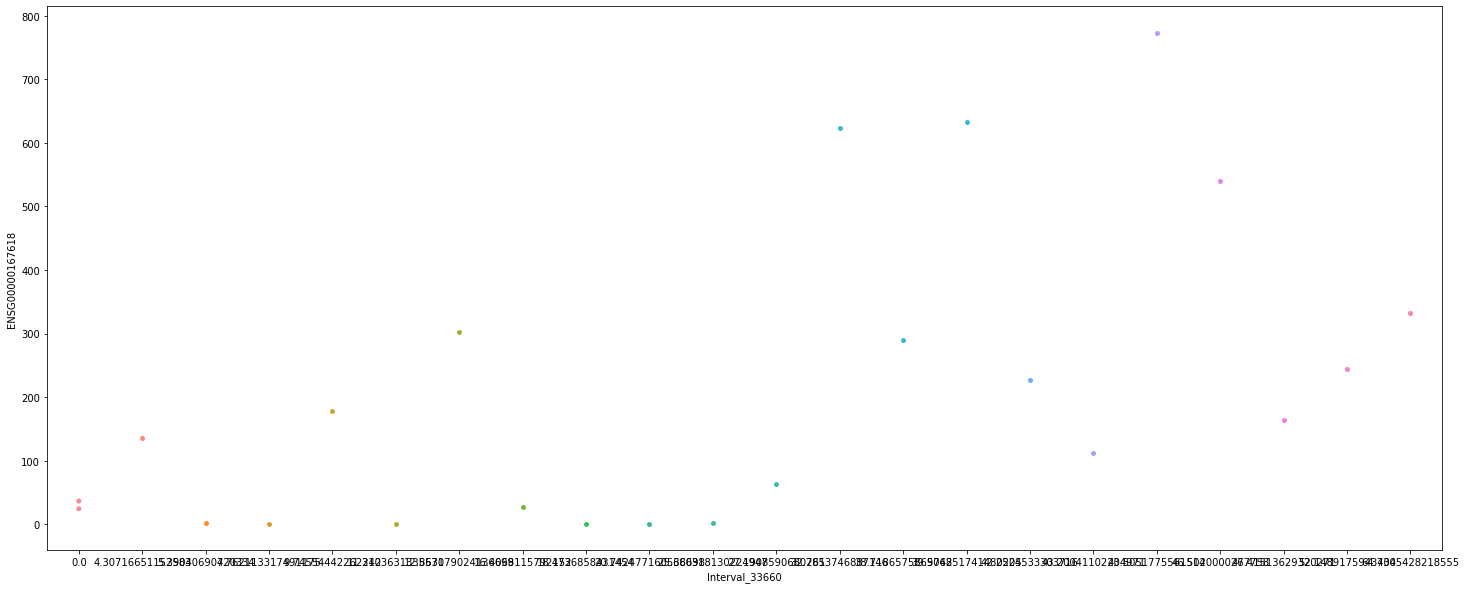

In [75]:
gene2interval(atac_counts_clonal,rna_counts_clonal,peak='Interval_33660',ensembl_ID='ENSG00000167618')

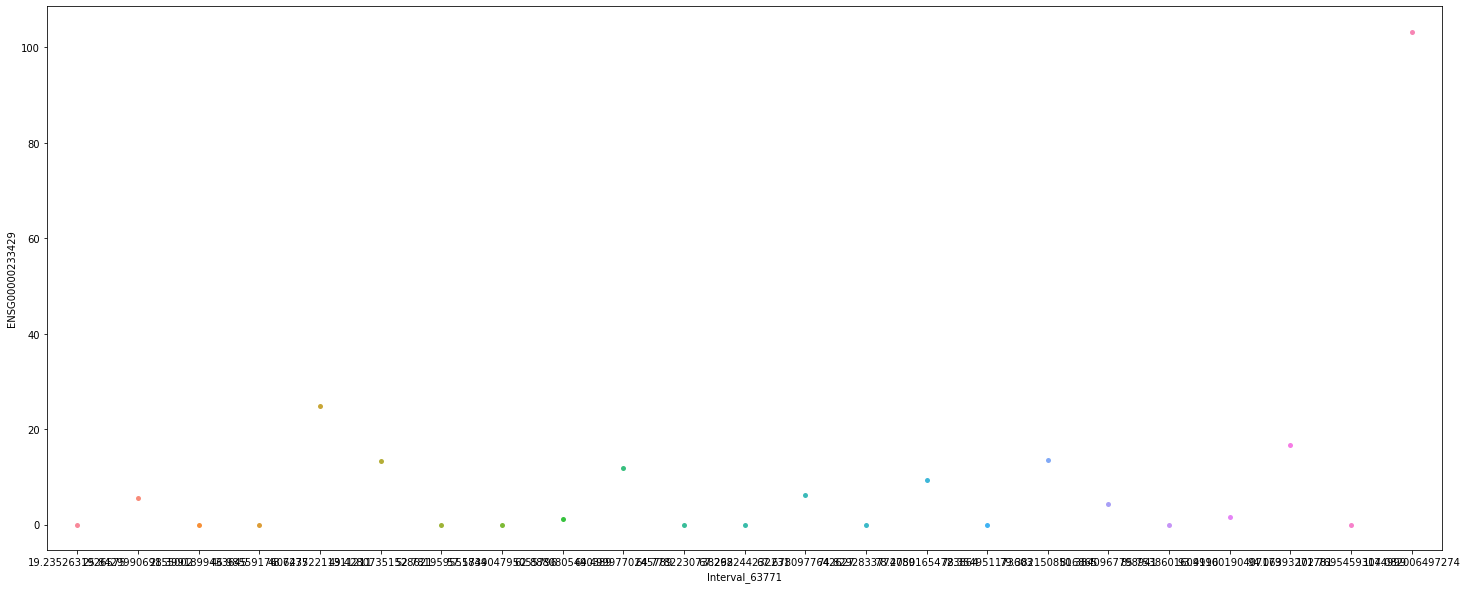

In [76]:
gene2interval(atac_counts_clonal,rna_counts_clonal,peak='Interval_63771',ensembl_ID='ENSG00000233429')

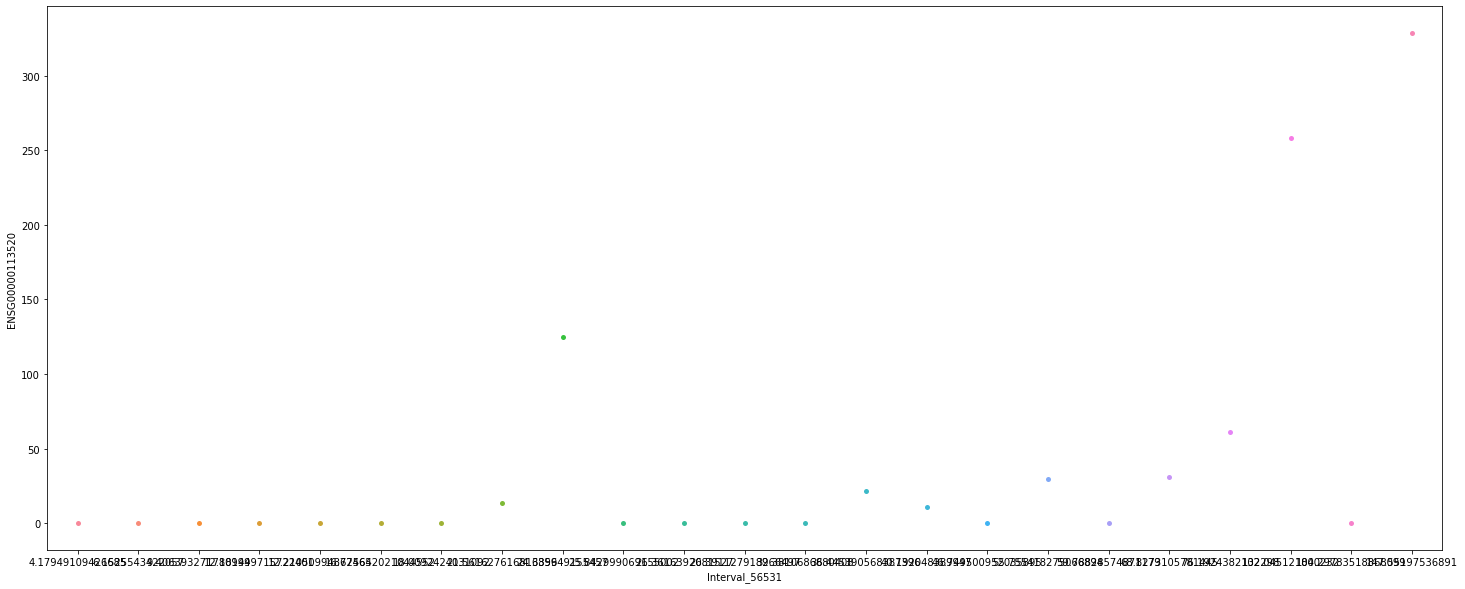

In [74]:
gene2interval(atac_counts_clonal,rna_counts_clonal,peak='Interval_56531',ensembl_ID='ENSG00000113520')